# Mastermind

**The aim of this code is to find the colour and order of 4 colours selected by a player from 8 possible colours with repeats allowed. Guesses are 'marked' with 1 (black marker peg) for a correct colour in the correct place and 0 (white marker peg) for a correct colour in the wrong place.**

**Approach**: Create a list of all the possible solutions. Simply take a randomly selected guess from the possible solutions, mark it against the provided solution and use the resulting constraints to remove invalid entries from the list of possibles. Repeat until success. 

The first option here is to let the computer play against itself and see how quickly it exhausts the possibilities. I'm sure there's a mathematical calculation for this but I just wanted to get a rough idea of how many guesses would typically be needed. With 10000 trials (on 8 colours, repeats allowed) the computer on average needed 5.4 guesses and solved them all within 9 guesses. It took a minute or two on my computer. I included the option to display the board because I do love a bit of visualisation.

The second option is more interactive - letting the computer guess and the user provide the 'marks'.. perhaps for a bit of assistance with an actual game??


In [1]:
import matplotlib.pyplot as plt
from random import randrange

In [13]:
colours = [ '#ffffff','#000000','#dddd33','#ff7f00','#984ea3'
               ,'#4daf4a','#377eb8','#ff0000']

def init(n=8):
# create working list of possible answers, repeats allowed
    poss = [[i,j,k,l] for i in range(n) for j in range(n) for 
         k in range(n) for l in range(n)]
    return(poss)

def make_a_guess(poss):
# choose randommly from list of possible combinations
# NB could reduce number of guesses required by picking options to maximise the number of 
# solutions eliminated (as in Who's Who)
    randix = randrange(len(poss))
    guess = poss[randix]
    return(guess)

def mark_guess(ans, guess):
# calculate how many colours are correct and how many in the right place
    result = []
    num_correct = 0
    for g in set(guess):
        num_correct = num_correct + min(guess.count(g), ans.count(g))
    # right colour in right place - > result = 1    
    for i,(a,g) in enumerate(zip(ans, guess)):
        if g == a: 
            result.append(1) 
    # right colour wrong place -> result = 0
    for i in range(num_correct - sum(result)) : result.append(0)    
    return(result)

def apply_constraint(poss,guess,result):
# remove the options that are no longer possible
    poss.remove(guess) 
    newp = []
    # find those that have the right number of matching colours in the same place as the guess
    num_correct = sum(result) 
    for p in poss:
        count = 0
        for c,g in zip(p, guess):
            if c == g: count = count+1
        if count == num_correct: 
            newp.append(p)
    poss = newp
    newp = []
    # select only those with the right number of matching colours regardless of place
    num_correct = len(result) 
    for p in poss:
        count = 0
        tmp = guess.copy()
        for c in p:
            if c in tmp:
                count = count+1
                tmp.remove(c)
        if count == num_correct: 
            newp.append(p)
    return(newp)

In [3]:
## some visual aids..

def draw_board(ans=()):
# draw the board together with the given solution
    ans = list(ans)
    fig, ax = plt.subplots(figsize=(10,2.5), frameon = False)
    ax.set(xlim=(0,200), ylim=(0,50))
    ax.axis("off")
    for i in range(0,200,10): 
        ax.axvline(i,color='k',lw=1)
    for i in range(0,50,10) : 
        ax.axhline(i,color='k',lw=1)
    ax.axvline(190,color='k',lw=3); ax.axvline(200,color='k',lw=3); ax.axvline(0, color='k',lw=3)
    ax.axhline(0,  color='k',lw=3); ax.axhline(40, color='k',lw=3); ax.axhline(50,color='k',lw=3)
    
    for i,c in enumerate(ans):
        ax.scatter(195,i*10 +5, s=300, color = colours[c], alpha=.9, edgecolors='k')
        ax.text(193.5,i*10 +2.5, c, fontsize=16, color = 'k')
    return(ax)

def add_a_guess(ax, guess,result, guess_no = 1):
# add a guess and given result to the board
    x = guess_no*10 - 5 # centre x of column
    for i,c in enumerate(guess):
        ax.scatter(x,i*10 +5, s=300, color = colours[c], alpha=.9, edgecolors='k')
        ax.text(x-1.5,i*10 +2.5, c, fontsize=16, color = 'k')
    for i,c in enumerate(result):
        if i < 2: ax.scatter(x-2+4*i,47, s=100, color=colours[c], edgecolors='k')
        if i >=2: ax.scatter(x-2+4*(i-2),43, s=100, color=colours[c], edgecolors='k')
    return()

# for more interactive version
def input_solution(colours):
# draw out the available colours and their corresponding numbers
    fig, ax = plt.subplots(figsize=(5,2))
    ax.set(xlim=(0,100), ylim=(0,40))
    ax.axis('off')
    for i,c in enumerate(colours):
        ax.scatter(i*10+7.5, 25, s=300, color = c, alpha=0.9, edgecolors='k')
        ax.text(i*10+5, 10, i, fontsize=16, color='k' )
    plt.show()
    a1 = int(input("Enter first colour (0-7): ")) 
    a2 = int(input("Enter second colour (0-7): ")) 
    a3 = int(input("Enter third colour (0-7): ")) 
    a4 = int(input("Enter fourth colour (0-7): ")) 
    return([a1,a2,a3,a4])

def display_guess(guess): 
    guess = list(guess)
    fig, ax = plt.subplots(figsize=(5,2))
    ax.set(xlim=(0,100), ylim=(0,40))
    ax.axis('off')
    for i,c in enumerate(guess):
        ax.scatter(i*10+7.5, 25, s=300, color = colours[c], alpha=0.9, edgecolors='k')
        ax.text(i*10+5, 10, c, fontsize=16, color='k' )
    plt.show()
    return()

In [4]:
# Main option 1
def play(ans, display=True):
# play mastermind with solution provided
    # check valid ans - must be 4 ints between 0 and 7
    if min(ans)<0 or max(ans)>7: return("invalid answer")
    if len(ans) != 4: return("invalid answer")
    
    poss = init()
    if display: ax = draw_board(ans)

    # first guess
    guess_no = 1
    guess = make_a_guess(poss)
    result = mark_guess(ans, guess)
    # add to board
    if display: add_a_guess(ax,guess,result,guess_no)

    while guess_no < 19:
        if sum(result) == 4: break # finished!!
        # apply constraints - reduce total possibilities
        poss = apply_constraint(poss, guess, result)
        # make a new guess
        guess_no = guess_no + 1
        guess = make_a_guess(poss)
        result = mark_guess(ans, guess)
        if display: add_a_guess(ax,guess,result,guess_no)
    plt.show()
    return(guess_no)

In [5]:
# Second option 
def play2():
# play mastermind interactively with computers guesses marked manually
    print("Possible colours :")
    # draw out the available colours and their corresponding numbers
    fig, ax = plt.subplots(figsize=(5,2))
    ax.set(xlim=(0,100), ylim=(0,40))
    ax.axis('off')
    for i,c in enumerate(colours):
        ax.scatter(i*10+7.5, 25, s=300, color = c, alpha=0.9, edgecolors='k')
        ax.text(i*10+5, 10, i, fontsize=16, color='k' )
    plt.show()
        
    poss = init()    
    guess_no = 1
    print("Guess ", guess_no)
    guess = make_a_guess(poss)
    display_guess(guess)
    print("Enter the result; Number of black pegs = number of correct colours in the right place.")
    print("Number of white pegs = number of correct colours in the wrong place.")
    b = int(input("Enter number of black pegs (0-4): ") )
    w = int(input("Enter number of white pegs (0-" + str(4-b) + "): "))
    result = [1]*b + [0]*w
    
    #loop
    while guess_no < 19:
        if sum(result) == 4: 
            print("Finished!") 
            break 
        # apply constraints - reduce total possibilities
        poss = apply_constraint(poss, guess, result)
        if len(poss)==0 : 
            print("Something's gone wrong. No possible solution!")
            return()
        # make a new guess
        guess_no = guess_no + 1
        print("Guess ", guess_no)
        guess = make_a_guess(poss)
        display_guess(guess)
        print("Enter the result :")
        b = int(input("Number of black pegs (0-4): "))
        w = int(input("Number of white pegs (0-" + str(4-b) + "): "))
        result = [1]*b + [0]*w
    return(guess_no)

In [6]:
# set the answer and see how it does..
#num_guesses = play(input_solution(colours))

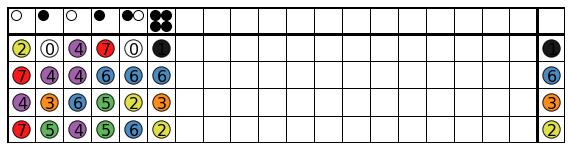

6

In [7]:
# or just enter the solution as an array
play([2,3,6,1])

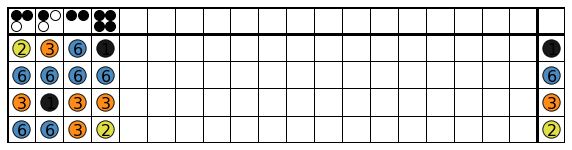

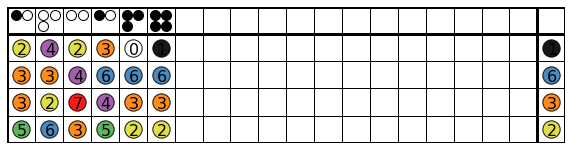

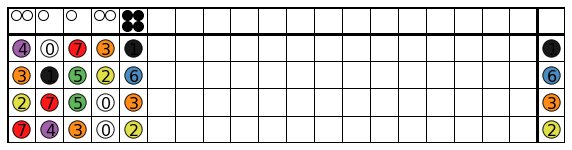

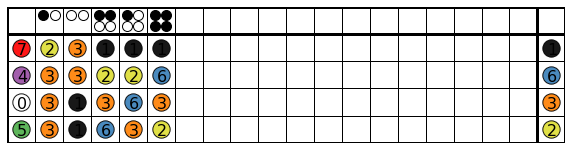

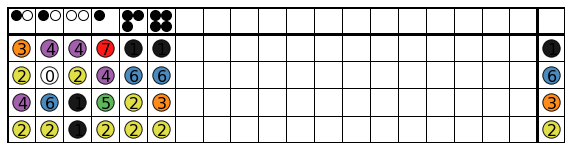

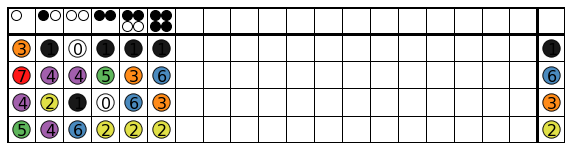

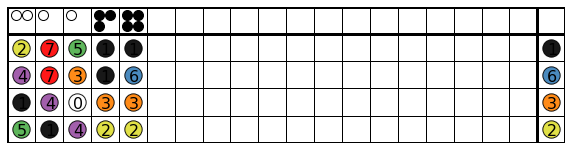

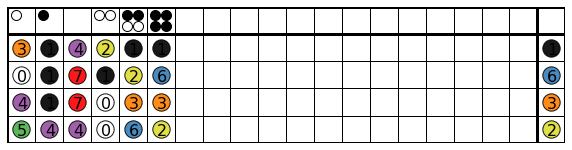

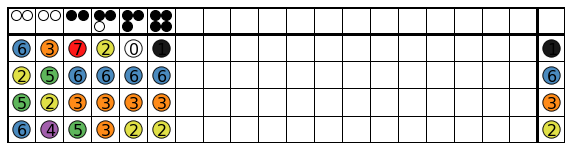

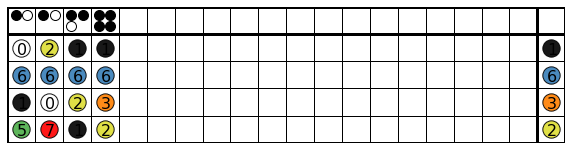

 maximum number of guesses required:  6


In [8]:
# The first guess is random so comparing over a few attempts..
maxits=0
for i in range(10):
    its = play([2,3,6,1])
    if its > maxits: maxits = its
print(" maximum number of guesses required: ", maxits)

Possible colours :


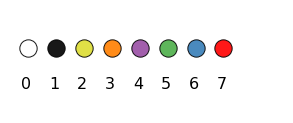

Guess  1


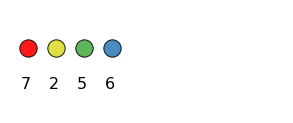

Enter the result; Number of black pegs = number of correct colours in the right place.
Number of white pegs = number of correct colours in the wrong place.


Enter number of black pegs (0-4):  0
Enter number of white pegs (0-4):  2


Guess  2


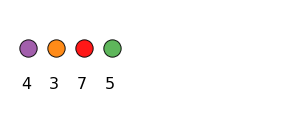

Enter the result :


Number of black pegs (0-4):  1
Number of white pegs (0-3):  0


Guess  3


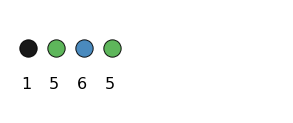

Enter the result :


Number of black pegs (0-4):  1
Number of white pegs (0-3):  1


Guess  4


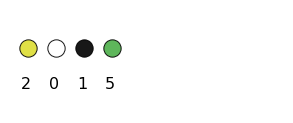

Enter the result :


Number of black pegs (0-4):  1
Number of white pegs (0-3):  1


Guess  5


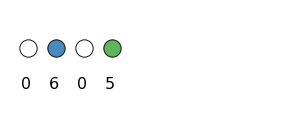

Enter the result :


Number of black pegs (0-4):  0
Number of white pegs (0-4):  1


Guess  6


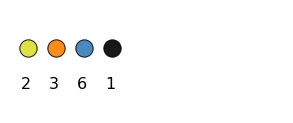

Enter the result :


Number of black pegs (0-4):  4
Number of white pegs (0-0):  0


Finished!


6

In [9]:
## an interactive game ..
## Take care with marking - mistakes lead to no possible solution
play2()

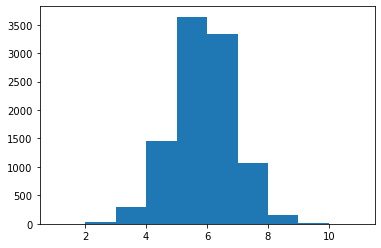

In [14]:
# The first guess is random so comparing over a few attempts..
num_guesses = []
for i in range(10000):
    g = play([2,3,6,1], display=False)
    num_guesses.append(g)
out = plt.hist(num_guesses, bins=range(1,12))

In [15]:
sum(num_guesses)/10000

5.3853

In [16]:
max(num_guesses)

9